In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition

In [250]:
def getFeatures(fileName):
    df = pd.read_csv(fileName, index_col='datetime')

    # arm angle calculation using accelerometer data
    df['angle'] = 180 / np.pi * np.arctan(df['wearable-xl1-z'] / np.sqrt(np.square(df['wearable-xl1-x']) + np.square(df['wearable-xl1-z'])))

    # get only interesting columns
    df = df[['angle', 'wearable-mag-xl1']]

    # remove NaN values
    df = df.dropna()
    # convert index to DatetimeIndex
    df.index = pd.DatetimeIndex(df.index)


    # resample data within interval given in resampleInterval ('1S' = 1 second intervals)
    resampleInterval = '1S'
    minimum = df.resample(resampleInterval).min()
    maximum = df.resample(resampleInterval).max()
    mean = df.resample(resampleInterval).mean()
    std = df.resample(resampleInterval).std()
    summ = df.resample(resampleInterval).sum()

    # stack features intu np matrix
    # format: [angMin, magMin, angMax, magMax, angMean, magMean, angStd, magStd, angSum, magSum]
    # features = np.hstack((minimum.as_matrix(), maximum.as_matrix()))


    # rename column labels in DataFrame
    minimum.rename(columns={'angle': 'angle min'}, inplace=True)
    minimum.rename(columns={'wearable-mag-xl1': 'magnitude min'}, inplace=True)
    
    maximum.rename(columns={'angle': 'angle max'}, inplace=True)
    maximum.rename(columns={'wearable-mag-xl1': 'magnitude max'}, inplace=True)
    
    mean.rename(columns={'angle': 'angle mean'}, inplace=True)
    mean.rename(columns={'wearable-mag-xl1': 'magnitude mean'}, inplace=True)
    
    std.rename(columns={'angle': 'angle std'}, inplace=True)
    std.rename(columns={'wearable-mag-xl1': 'magnutude std'}, inplace=True)
    
    summ.rename(columns={'angle': 'angle sum'}, inplace=True)
    summ.rename(columns={'wearable-mag-xl1': 'magnitude sum'}, inplace=True)
    
    # collect DataFrames
    features = [minimum, maximum, mean, std, summ]
    #features = [mean, std]
    features = pd.concat(features, axis=1)
    features = features.dropna()
    
    return [features, std]

In [339]:
# load features from data over a night
[features, std] = getFeatures('data_01.csv')
features

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,angle min,magnitude min,angle max,magnitude max,angle mean,magnitude mean,angle std,magnutude std,angle sum,magnitude sum
datetime,,,,,,,,,,
2016-06-01 22:29:59,32.193841,-0.047511,32.244962,-0.010220,32.219402,-0.028865,0.036148,0.026368,64.438803,-0.057731
2016-06-01 22:30:00,30.788470,-0.016030,32.426592,0.005761,31.363633,-0.004487,0.420399,0.006732,627.272655,-0.089732
2016-06-01 22:30:01,30.308726,-0.053662,31.992817,0.006803,31.267711,-0.004252,0.486498,0.013520,594.086514,-0.080797
2016-06-01 22:30:02,30.592613,-0.062070,31.856599,0.007162,31.278201,-0.011289,0.423520,0.020998,625.564014,-0.225789
2016-06-01 22:30:03,30.634234,-0.054503,32.261122,0.008748,31.504123,-0.008512,0.447465,0.017006,630.082458,-0.170232
2016-06-01 22:30:04,30.059984,-0.020555,31.720273,0.006477,31.122753,-0.004536,0.431074,0.007207,622.455050,-0.090729
2016-06-01 22:30:05,29.452718,-0.027083,31.656489,0.036338,30.941184,-0.001528,0.571270,0.011927,618.823686,-0.030561
2016-06-01 22:30:06,29.888965,-0.027973,32.193841,0.013274,31.079869,-0.004728,0.511183,0.011891,497.277900,-0.075653
2016-06-01 22:30:07,30.301703,-0.052661,31.848236,0.003582,31.205939,-0.009355,0.441736,0.015890,624.118785,-0.187106


In [340]:
# cluster and label data using K-means into n clusters
label = KMeans(n_clusters=5, random_state=10).fit_predict(features)
np.ty

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

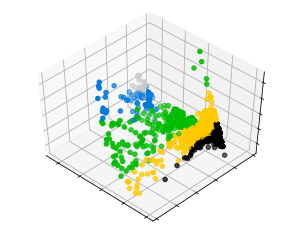

In [336]:
# make PCA (dimensionality reduction) to 3D and plot

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features)
X = pca.transform(features)

# only needed for non int labels (I think)
#y = np.choose(label, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=label, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [333]:
# change labels into two classes (merge clusters)

label[label == 0] = 1
label[label == 1] = 1
label[label == 2] = 0 #
label[label == 3] = 1
label[label == 4] = 0

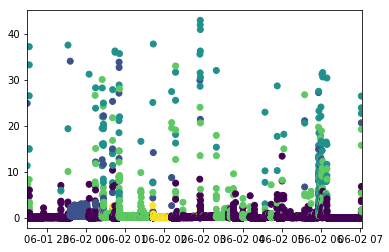

In [337]:
plt.scatter(std.index, std['angle std'], c=label)
plt.xlim(std.index[0], std.index[-1])
plt.show()